In [1]:
from src.api.factor import FactorAPI
app = FactorAPI.Test.FactorPerf(end_dt = 20240131)

Use device name: NVIDIA GeForce RTX 4090
Getting random factor values...
Running factor test for 2 factors in BM [defaults], write_down=True, display_figs=False
FactorPerfManager calc Finished!
FactorPerfManager plot Finished!
Analytic Test of Factor Performance datas are saved to /home/mengkjin/Workspace/learndl/results/perf_test/test_20241124195658/data.xlsx
Analytic Test of Factor Performance plots are saved to /home/mengkjin/Workspace/learndl/results/perf_test/test_20241124195658/plot.pdf


In [1]:
from src.api.factor import FactorAPI
app = FactorAPI.Test.FmpOptim(start_dt=20220101 , end_dt = 20240131 , prob_type = 'linprog')


Use device name: NVIDIA GeForce RTX 4090
Getting random factor values...
Running optim test for 2 factors in BM [defaults], write_down=True, display_figs=False
Optimization of PortfolioBuilderGroup(2 alphas , 3 benchmarks , 2 lags , 1 param_groups , 102 dates , (1224 builds) start!
Optimization of    0th [Fmp.factor1.csi300.Optim.lag0 ] Finished at 20220104 , time cost (ms) : {'parse_input': 396.75, 'solve': 125.98, 'output': 33.44}
Optimization of   50th [Fmp.factor1.csi1000.Optim.lag0] Finished at 20220208 , time cost (ms) : {'parse_input': 21.96, 'solve': 185.55, 'output': 20.03}
Optimization of  100th [Fmp.factor1.csi500.Optim.lag1 ] Finished at 20220308 , time cost (ms) : {'parse_input': 22.04, 'solve': 180.49, 'output': 19.43}
Optimization of  150th [Fmp.factor2.csi300.Optim.lag0 ] Finished at 20220407 , time cost (ms) : {'parse_input': 22.62, 'solve': 166.76, 'output': 18.9}
Optimization of  200th [Fmp.factor2.csi1000.Optim.lag0] Finished at 20220510 , time cost (ms) : {'parse_i

In [2]:
from src.api.factor import FactorAPI
app = FactorAPI.Test.FmpTop(end_dt = 20240131)

Getting random factor values...
Running top test for 2 factors in BM [defaults], write_down=True, display_figs=False
Generation of PortfolioBuilderGroup(2 alphas , 3 benchmarks , 1 lags , 4 param_groups , 5 dates , (120 builds) start!
Generation of    0th [Fmp.factor1.csi300.Top 20.lag0 ] Finished at 20240102 , time cost (ms) : {'parse_input': 0.0, 'solve': 320.35, 'output': 14.55}
Generation of   50th [Fmp.factor1.csi300.Top 50.lag0 ] Finished at 20240116 , time cost (ms) : {'parse_input': 0.0, 'solve': 15.55, 'output': 18.5}
Generation of  100th [Fmp.factor1.csi500.Top 20.lag0 ] Finished at 20240130 , time cost (ms) : {'parse_input': 0.0, 'solve': 15.33, 'output': 18.48}
Group Generation Finished , Total time: 6.29 secs, each optim time: 0.05
Group Accounting Finished , Total time: 9.27 secs.
FmpTopManager calc Finished!
FmpTopManager plot Finished!
Analytic Test of Top Portfolio datas are saved to /home/mengkjin/Workspace/learndl/results/top_port/test_20241124233818/data.xlsx
Analyt

Use device name: NVIDIA GeForce RTX 4090


Top_Attrib_Source of task top(params={})

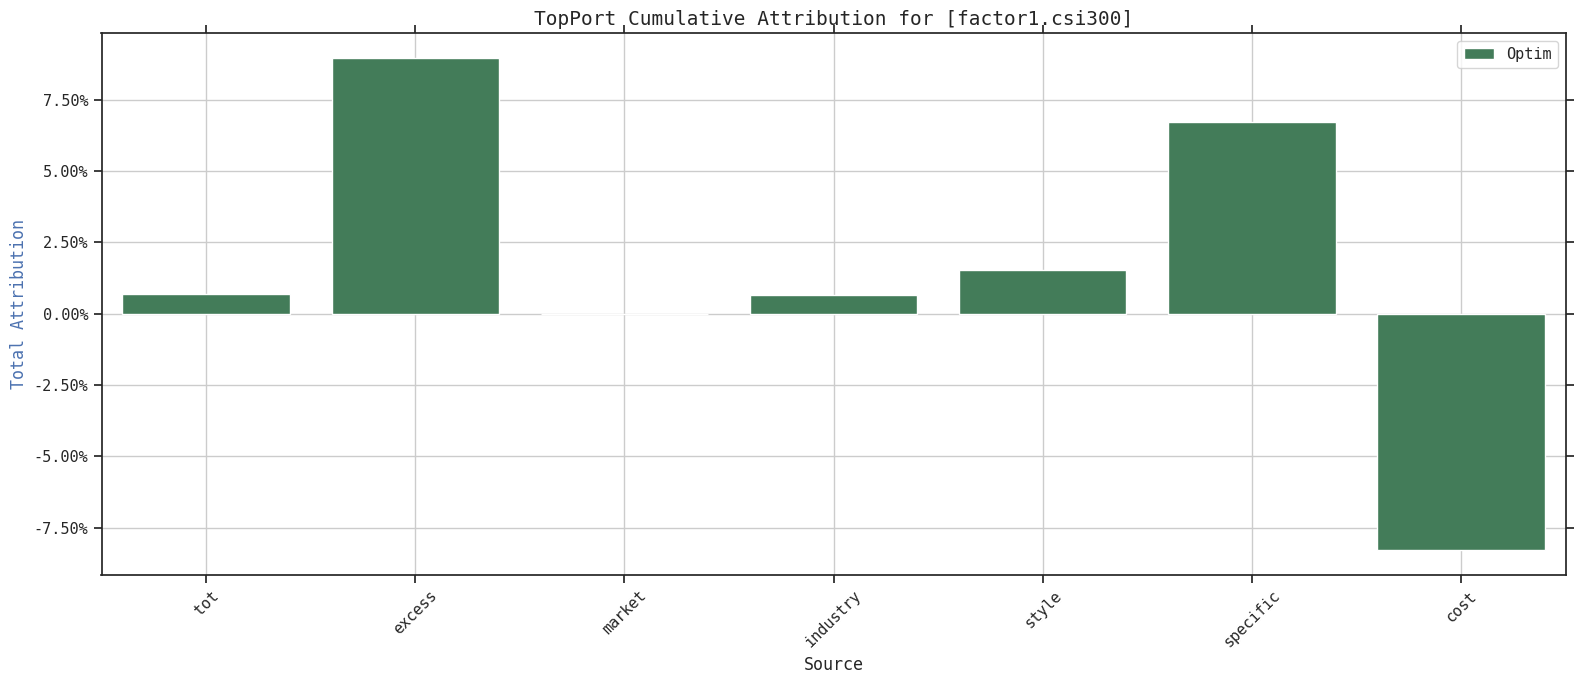

In [1]:
from src.factor.analytic.fmp_top.calculator import *
import torch
account : pd.DataFrame = torch.load('account.pt')
calc = Top_Attrib_Source()
calc.calc(account)
calc.plot(show=True)

In [3]:
calc.calc_rslt

contribution   -0.180477
dtype: float64

In [19]:
from src.factor.analytic.fmp_top.stat import *

def calc_optim_exp_style(account : pd.DataFrame):
    df = filter_account(account , pos_model_date=True)
    df = df.loc[:,['start','analytic']].set_index('start' , append=True)
    df = df.groupby(df.index.names , observed=True)['analytic'].apply(fetch_exp_style)
    if isinstance(df , pd.Series): df = df.to_frame()
    df = df.pivot_table('active' , df.index.names , columns='style' , observed=True)
    df = df.rename_axis(None , axis='columns').rename_axis(index={'start':'trade_date'})
    return df

# calc_optim_exp_style(account)

df = filter_account(account , pos_model_date=True)
df = df.loc[:,['end','attribution']].set_index('end' , append=True)
df = df.groupby(df.index.names , observed=True)['attribution'].apply(fetch_attrib_source)
df = df.reset_index('end',drop=True).groupby(df.index.names.difference('end')).sum()
df

AttributeError: 'numpy.ndarray' object has no attribute 'difference'